# ML HidroPrev com a API Keras

In [1]:
# Bibliotecas
import eda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import keras
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

2025-08-01 21:51:11.380015: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754099471.391003 3299099 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754099471.394343 3299099 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1754099471.403756 3299099 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754099471.403766 3299099 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1754099471.403767 3299099 computation_placer.cc:177] computation placer alr

In [2]:
dados_manaus = eda.data_processing('Cotas extraidas', '1985-01-01', '2020-12-31', ['dados_diarios_estacao_14990000.csv'])
dados_manaus

,14990000
Data,
1985-01-01,2169.0
1985-01-02,2178.0
1985-01-03,2186.0
1985-01-04,2194.0
1985-01-05,2201.0
...,...
2020-12-27,2062.0
2020-12-28,2072.0
2020-12-29,2080.0


### Machine Learning

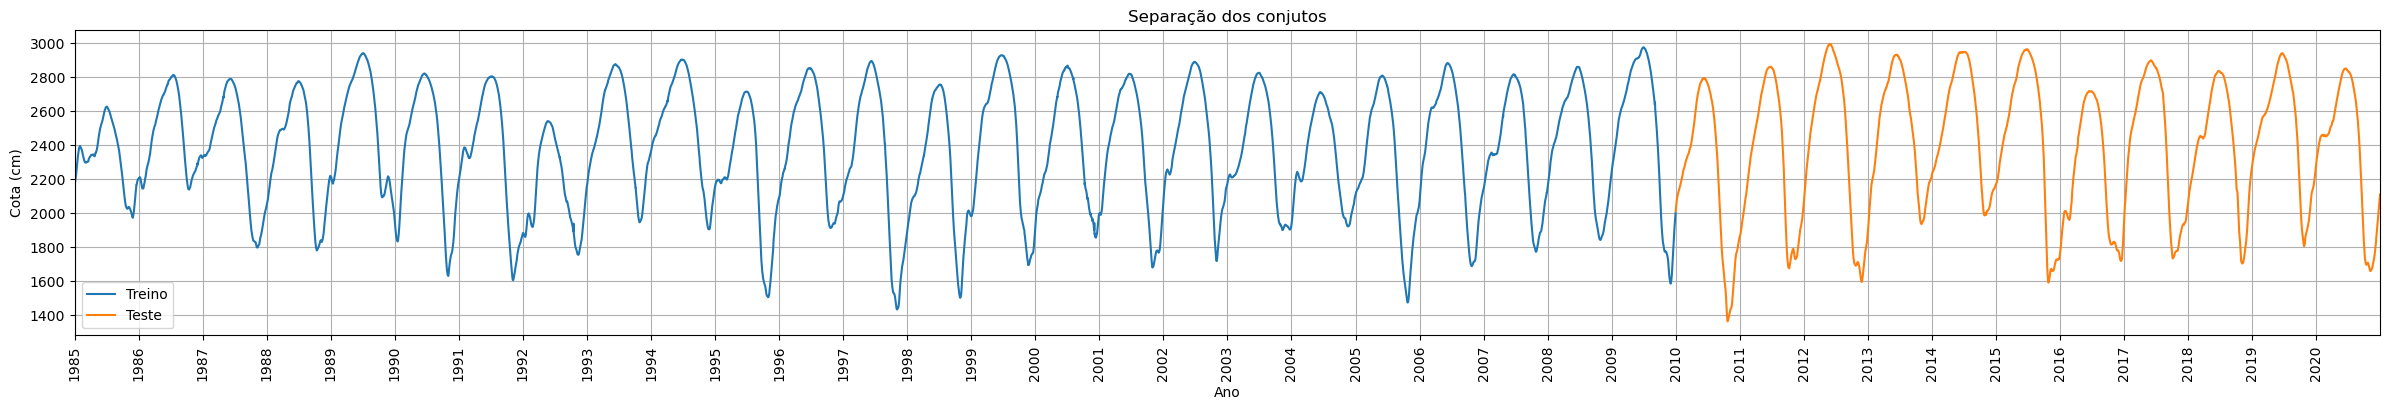

In [3]:
# Separação do conjunto
treino = dados_manaus[:'2009-12-31']
teste = dados_manaus['2010-01-01':]

plt.figure(figsize=(24, 4))
plt.plot(treino['14990000'])
plt.plot(teste['14990000'])
plt.legend(['Treino', 'Teste'])
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xlabel('Ano')
plt.ylabel('Cota (cm)')
plt.xticks(rotation=90)
plt.xlim(dados_manaus.index[0], dados_manaus.index[-1])
plt.tight_layout()
plt.title('Separação dos conjutos')
plt.show()

##### LSTM

In [5]:
def create_multi_step_dataset(series, janela, n_steps):
    X, y = [], []
    for i in range(len(series) - janela - n_steps + 1):
        X.append(series[i:i+janela])
        y.append(series[i+janela:i+janela+n_steps])
    return np.array(X), np.array(y)

In [7]:
janela = 15
steps = 15

X, y = create_multi_step_dataset(dados_manaus['14990000'].values, janela, steps)

x_train = X[:treino.shape[0]-janela]
y_train = y[:treino.shape[0]-janela]

x_test = X[treino.shape[0]-janela:]
y_test = y[treino.shape[0]-janela:]

x_scale = MinMaxScaler()
x_train = x_scale.fit_transform(x_train)
x_test = x_scale.transform(x_test)

y_scale = MinMaxScaler()
y_train = y_scale.fit_transform(y_train)
y_test = y_scale.transform(y_test)

In [7]:
lstm = keras.models.Sequential([
    keras.layers.Input(shape=(janela, 1)),
    keras.layers.LSTM(150),
    keras.layers.Dense(steps)
])

lstm.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.MeanAbsoluteError()])

lstm.fit(x_train, y_train, epochs=50)

I0000 00:00:1753984301.407494 2783197 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10151 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/50


I0000 00:00:1753984302.941081 2783575 cuda_dnn.cc:529] Loaded cuDNN version 90300


285/285 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0623 - mean_absolute_error: 0.1601
Epoch 2/50
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0086 - mean_absolute_error: 0.0703
Epoch 3/50
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0050 - mean_absolute_error: 0.0526
Epoch 4/50
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0039 - mean_absolute_error: 0.0462
Epoch 5/50
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0032 - mean_absolute_error: 0.0413
Epoch 6/50
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0022 - mean_absolute_error: 0.0331
Epoch 7/50
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0019 - mean_absolute_error: 0.0307
Epoch 8/50
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0018 - mean_absolute_error: 0.0294
Epoch 9/50
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018 - mean_absolute_error: 0.0295
Epoch 10/50
285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0018 - mean_absolute_error: 0.0290
Epoch 11/50
285/285 ━━━━━━━━━━━━━━━━━━━━

In [8]:
pred = lstm.predict(x_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [9]:
pred_inv = y_scale.inverse_transform(pred)
y_test_inv = y_scale.inverse_transform(y_test)

In [10]:
r2_score(y_test_inv, pred_inv)

0.9789600554524633

R²: 0.9995
MSE: 79.3052
RMSE: 8.9053
MAE: 7.0534


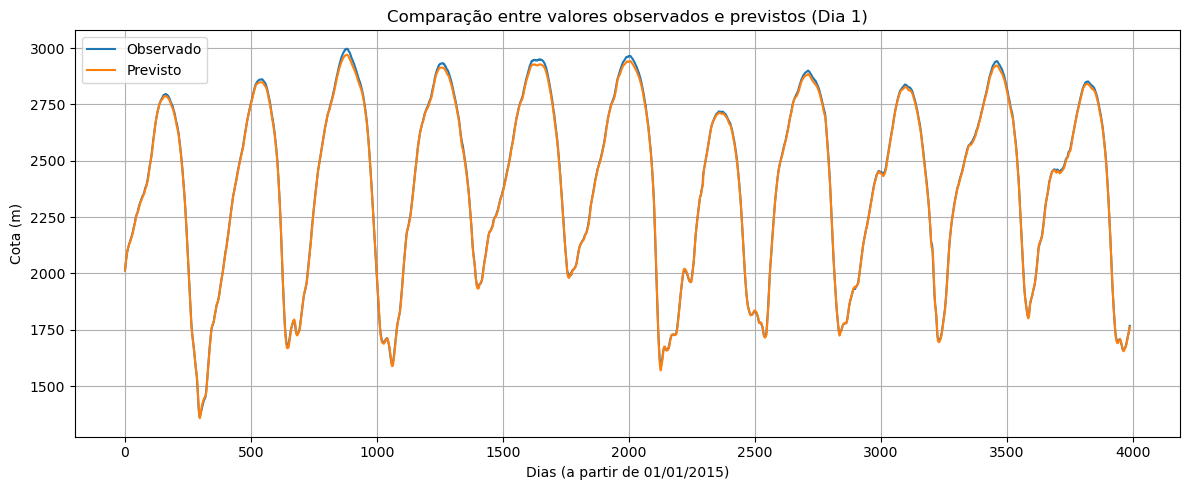

R²: 0.9973
MSE: 450.0434
RMSE: 21.2142
MAE: 14.7804


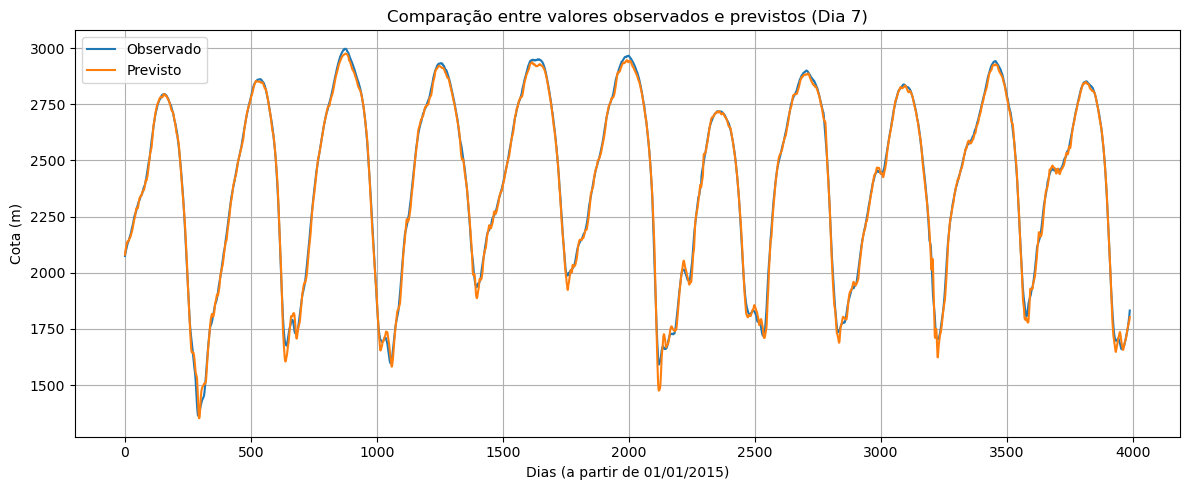

R²: 0.9864
MSE: 2276.9670
RMSE: 47.7176
MAE: 31.4356


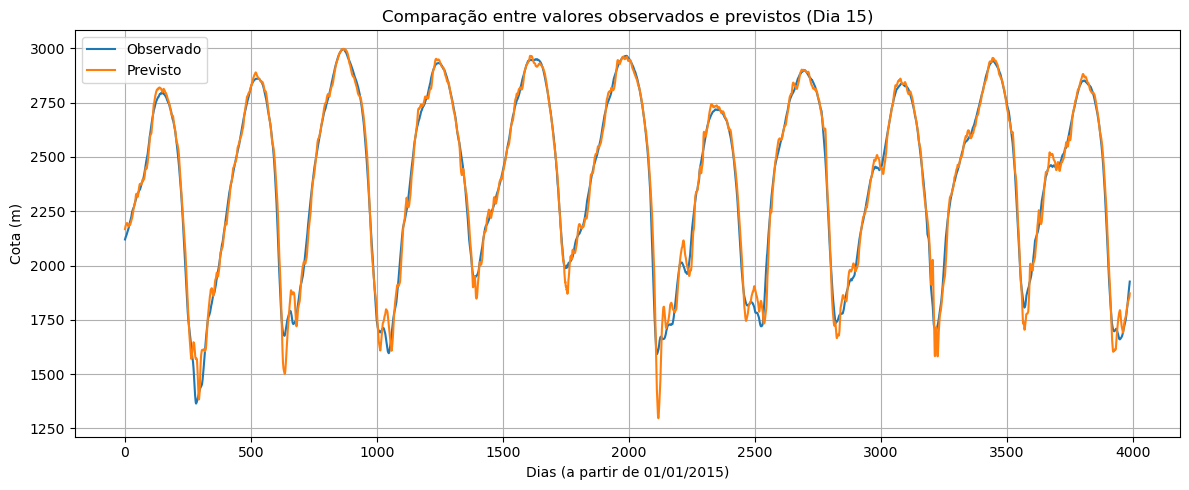

R²: 0.9375
MSE: 10512.9597
RMSE: 102.5327
MAE: 73.3836


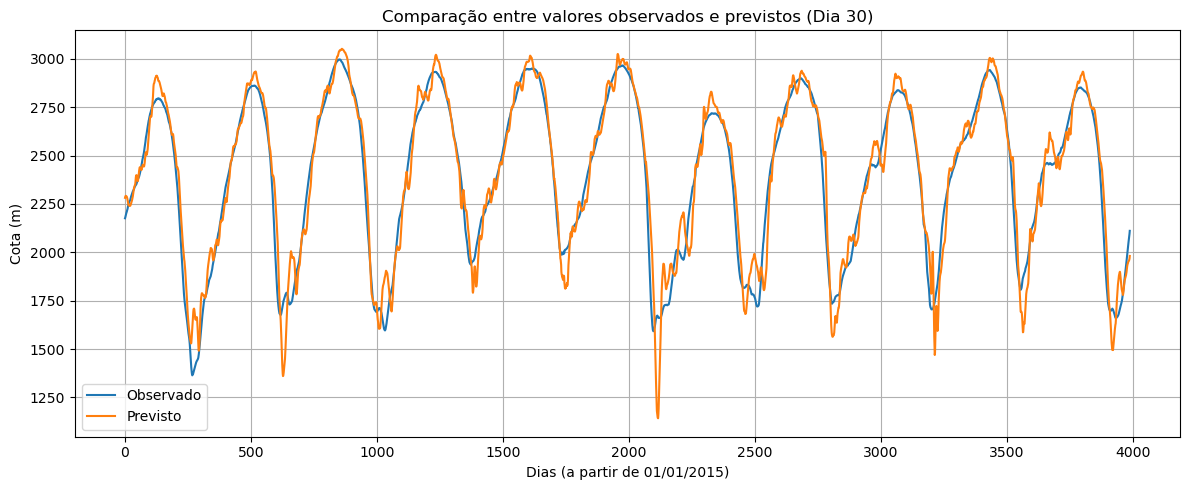

In [11]:
horizonte = [1, 7, 15, 30]

for i in horizonte:
    print(f"R²: {r2_score(y_test_inv[:,i-1], pred_inv[:,i-1]):.4f}")
    print(f"MSE: {mean_squared_error(y_test_inv[:, i-1], pred_inv[:,i-1]):.4f}")
    print(f"RMSE: {root_mean_squared_error(y_test_inv[:, i-1], pred_inv[:,i-1]):.4f}")
    print(f"MAE: {mean_absolute_error(y_test_inv[:, i-1], pred_inv[:,i-1]):.4f}")

    plt.figure(figsize=(12, 5))
    plt.plot(y_test_inv[:,i-1], label='Observado')
    plt.plot(pred_inv[:,i-1], label='Previsto')
    plt.xlabel('Dias (a partir de 01/01/2015)')
    plt.ylabel('Cota (m)')
    plt.title(f'Comparação entre valores observados e previstos (Dia {i})')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Testando com dados de 2020 até 2024

In [11]:
dados_manaus2 = eda.data_processing('Cotas extraidas', '2020-01-01', '2024-12-31', ['dados_diarios_estacao_14990000.csv'])
dados_manaus2

,14990000
Data,
2020-01-01,2287.0
2020-01-02,2299.0
2020-01-03,2306.0
2020-01-04,2312.0
2020-01-05,2318.0
...,...
2024-12-27,1751.0
2024-12-28,1769.0
2024-12-29,1785.0


In [12]:
x_test2, y_test2 =  create_multi_step_dataset(dados_manaus2['14990000'].values, janela, steps)

x_test2 = x_scale.transform(x_test2)

In [13]:
pred2 = lstm.predict(x_test2)

56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [14]:
pred2_inv = y_scale.inverse_transform(pred2)

R²: 0.9997
MSE: 17.0364
RMSE: 4.1275
MAE: 3.1105


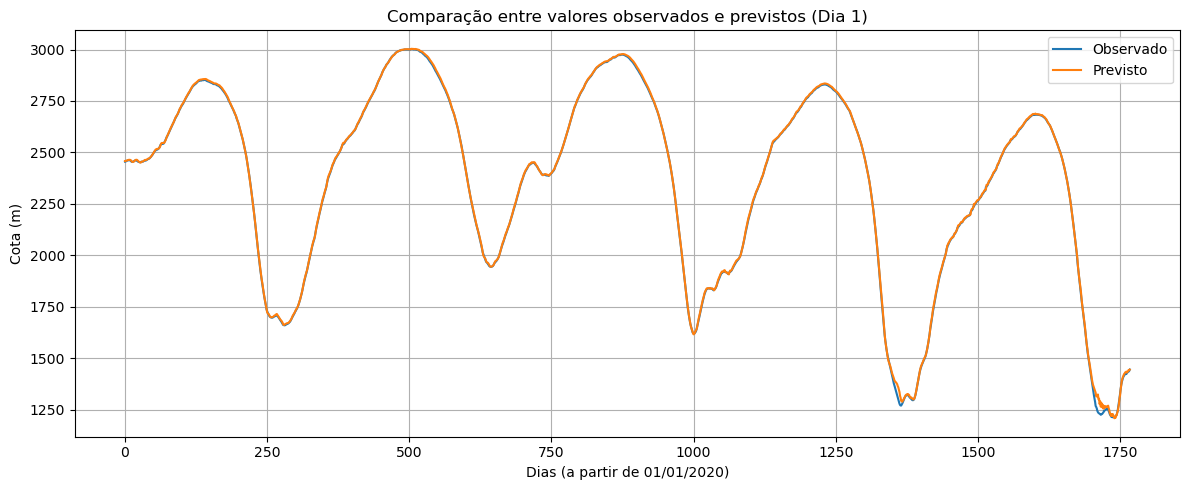

R²: 0.9961
MSE: 254.1103
RMSE: 15.9408
MAE: 10.1595


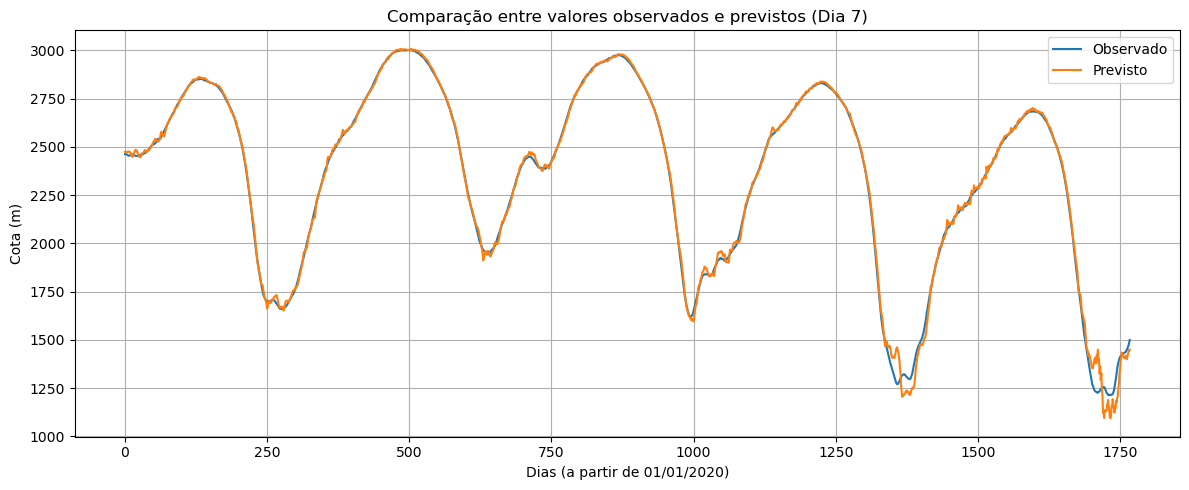

R²: 0.9814
MSE: 1456.5621
RMSE: 38.1649
MAE: 25.3155


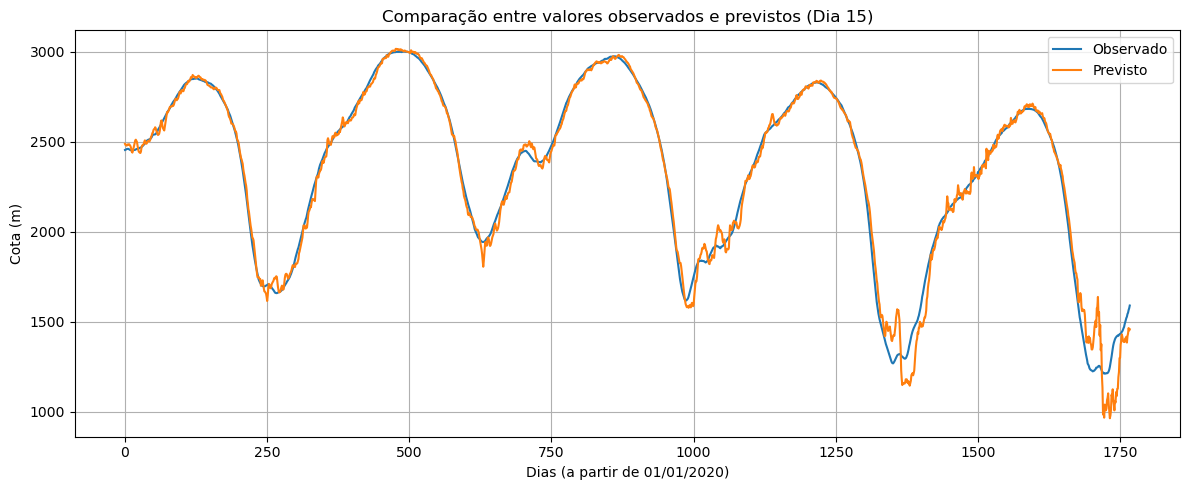

R²: 0.9392
MSE: 6314.3508
RMSE: 79.4629
MAE: 56.1488


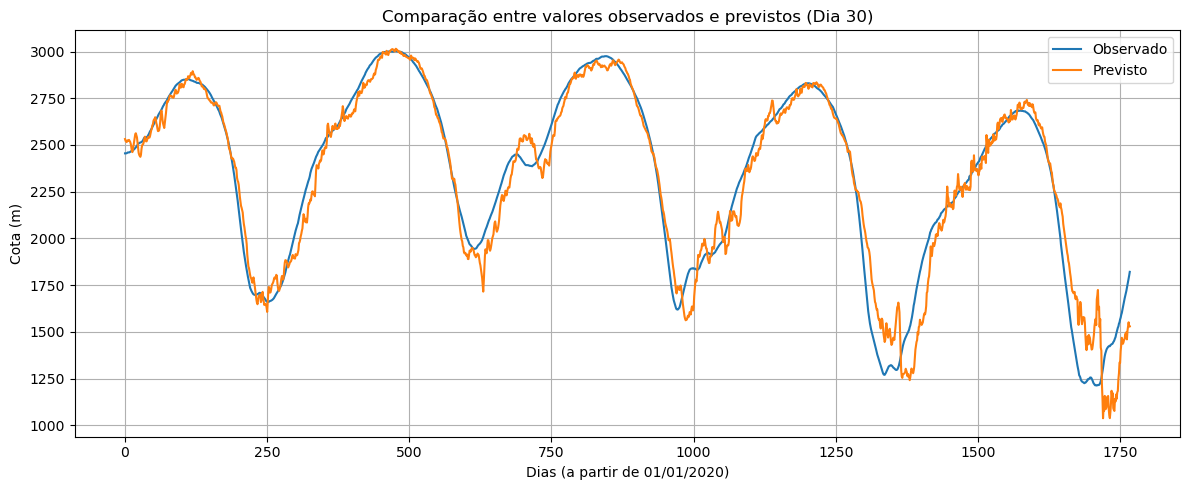

In [15]:
for i in horizonte:
    print(f"R²: {r2_score(y_test2[:,i-1], pred2_inv[:,i-1]):.4f}")
    print(f"MSE: {mean_squared_error(y_test_inv[:, i-1], pred_inv[:,i-1]):.4f}")
    print(f"RMSE: {root_mean_squared_error(y_test_inv[:, i-1], pred_inv[:,i-1]):.4f}")
    print(f"MAE: {mean_absolute_error(y_test_inv[:, i-1], pred_inv[:,i-1]):.4f}")
    
    plt.figure(figsize=(12, 5))
    plt.plot(y_test2[:,i-1], label='Observado')
    plt.plot(pred2_inv[:,i-1], label='Previsto')
    plt.xlabel('Dias (a partir de 01/01/2020)')
    plt.ylabel('Cota (m)')
    plt.title(f'Comparação entre valores observados e previstos (Dia {i})')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [ ]:
lstm.save('Modelos/lstm_1990000_w15_s30.keras')

### Fazendo observações

In [8]:
lstm = keras.models.load_model("Modelos/lstm_14990000_n150_w15_s15.keras")

I0000 00:00:1754099539.291762 3299099 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1013 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6


In [ ]:
# Cota de 16/07/2025 à 31/07/2025
x_test3 = np.array([[2887.0, 2886.0, 2883.0, 2881.0, 2878.0, 2876.0, 2873.0, 2871.0, 2868.0, 2866.0, 2864.0, 2861.0, 2857.0, 2855.0, 2851.0]])

In [10]:
x_test3 = x_scale.transform(x_test3)
x_test3

array([[0.94167207, 0.94102398, 0.93907971, 0.93778354, 0.93583927,
        0.9345431 , 0.93259883, 0.93130266, 0.92935839, 0.92806222,
        0.92676604, 0.92482178, 0.92222942, 0.92093325, 0.91834089]])

In [11]:
pred3 = lstm.predict(x_test3)
pred3_inv = y_scale.inverse_transform(pred3)
pred3_inv

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


I0000 00:00:1754099559.035921 3434986 cuda_dnn.cc:529] Loaded cuDNN version 90300


array([[2848.6946, 2844.6887, 2841.1626, 2837.4277, 2831.9072, 2828.4553,
        2823.8997, 2819.9536, 2815.016 , 2808.3823, 2801.743 , 2796.6404,
        2790.7546, 2783.0798, 2777.4211]], dtype=float32)

In [12]:
pred4 = lstm.predict(pred3)
pred4_inv = y_scale.inverse_transform(pred4)
pred4_inv

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[2772.2273, 2765.3164, 2758.389 , 2752.045 , 2743.1138, 2736.081 ,
        2728.646 , 2721.1147, 2712.3374, 2702.919 , 2692.623 , 2683.1194,
        2674.4878, 2663.6125, 2654.0273]], dtype=float32)